<a href="https://colab.research.google.com/github/aaronmj7/Assignment_DMD/blob/main/Assignment_DMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - A Comparitive Study on Gaussian Mixture Models and K-Means for Data Clustering

By Aaron Modiyil Joseph

Student ID: 22018497





In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# Set seaborn theme
sns.set_theme(context='paper', color_codes=True)

# Load Data

In [ ]:
# Read the data as a dataframe
filepath = '/content/drive/MyDrive/apartments_for_rent_classified_10K.csv'
rent_df = pd.read_csv(filepath, sep=';')

In [ ]:
# Display the data
pd.set_option('display.max_columns', None)
rent_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [ ]:
# Display info
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

# Data Preprocessing

In [ ]:
# Check for dupiclates
dups = rent_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
# Select necessary columns needed for clustering
cols = ['price', 'square_feet', 'latitude', 'longitude']
data = rent_df[cols]
data

,price,square_feet,latitude,longitude
0,790,101,38.9057,-76.9861
1,425,106,37.9680,-87.6621
2,1390,107,38.8910,-77.0816
3,925,116,47.6160,-122.3275
4,880,125,38.8738,-77.1055
...,...,...,...,...
9995,6000,6300,44.9000,-93.3233
9996,25000,8716,34.4331,-119.6331
9997,11000,11318,39.0287,-77.2409
9998,4790,40000,40.7716,-73.9876


In [ ]:
# Count missing values in each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	price: 0
	square_feet: 0
	latitude: 10
	longitude: 10


In [ ]:
# Drop rows with missing values
data = data.dropna()
# Reset index
data.reset_index(drop=True, inplace=True)
data

,price,square_feet,latitude,longitude
0,790,101,38.9057,-76.9861
1,425,106,37.9680,-87.6621
2,1390,107,38.8910,-77.0816
3,925,116,47.6160,-122.3275
4,880,125,38.8738,-77.1055
...,...,...,...,...
9985,6000,6300,44.9000,-93.3233
9986,25000,8716,34.4331,-119.6331
9987,11000,11318,39.0287,-77.2409
9988,4790,40000,40.7716,-73.9876


<Axes: >

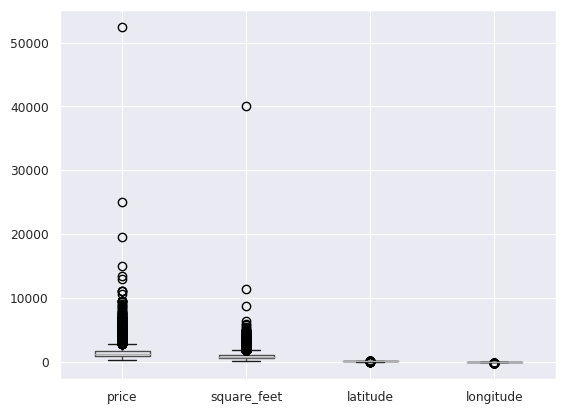

In [ ]:
# Plot Box plot
data.boxplot()

In [ ]:
# Calculate Z-score
Z = (data-data.mean())/data.std()
Z

,price,square_feet,latitude,longitude
0,-0.647046,-1.288690,0.220264,1.120962
1,-0.985998,-1.281067,0.049644,0.443543
2,-0.089864,-1.279542,0.217589,1.114903
3,-0.521680,-1.265819,1.805150,-1.756066
4,-0.563468,-1.252096,0.214460,1.113386
...,...,...,...,...
9985,4.191149,8.163405,1.310959,0.084325
9986,21.835236,11.847267,-0.593550,-1.585099
9987,8.834330,15.814738,0.242644,1.104795
9988,3.067499,59.548404,0.559775,1.311225


In [ ]:
# Discard outliers
data = data.loc[((Z > -3).sum(axis=1)==4) & ((Z <= 3).sum(axis=1)==4),:]
# Reset index
data.reset_index(drop=True, inplace=True)
data

,price,square_feet,latitude,longitude
0,790,101,38.9057,-76.9861
1,425,106,37.9680,-87.6621
2,1390,107,38.8910,-77.0816
3,925,116,47.6160,-122.3275
4,880,125,38.8738,-77.1055
...,...,...,...,...
9736,2300,2879,33.0476,-96.7467
9737,3495,2900,43.0724,-89.4003
9738,2900,2900,38.6857,-121.1532
9739,4300,2906,37.7547,-121.9529


In [ ]:
# Analyse the data
data.describe()

,price,square_feet,latitude,longitude
count,9741.000000,9741.000000,9741.000000,9741.000000
mean,1406.236321,905.597988,37.620349,-94.117784
std,669.563060,415.946004,5.258642,15.073163
min,200.000000,101.000000,25.380100,-123.328300
25%,943.000000,647.000000,33.679500,-98.557600
50%,1259.000000,800.000000,38.839100,-93.651600
75%,1669.000000,1087.000000,41.349500,-81.793000
max,4700.000000,2906.000000,48.787100,-70.191600


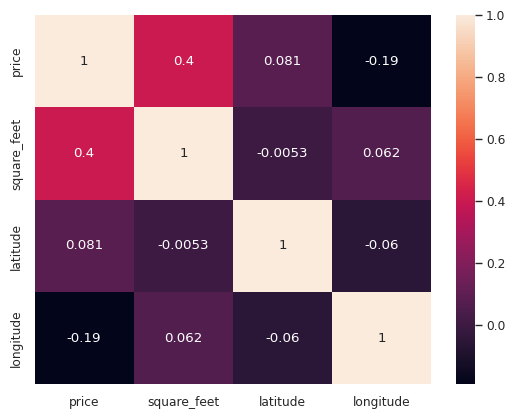

In [ ]:
# Display Correlation with heat map
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# Scale the data
scaler = MinMaxScaler().fit(data)
data_scaled = scaler.transform(data)

# Prototype-based Clustering: Gaussian Mixture Model Clustering

In [ ]:
# Decide upon number of components for GMM
range_n_clusters = range(2, 8)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=1)
    clusterer.fit(data)
    # Predict labels to calculate silhouette score
    cluster_labels = clusterer.predict(data)

    # Find average silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters, ",the average silhouette score is :", silhouette_avg)

For n_clusters = 2 ,the average silhouette score is : 0.4984009681719554
For n_clusters = 3 ,the average silhouette score is : 0.272163003644281
For n_clusters = 4 ,the average silhouette score is : 0.18125790456947816
For n_clusters = 5 ,the average silhouette score is : 0.02299957145913784
For n_clusters = 6 ,the average silhouette score is : -0.07334837184337775
For n_clusters = 7 ,the average silhouette score is : -0.07599871611961506


In [ ]:
# GMM clustering with n_components=2
gmm = GaussianMixture(2, covariance_type='full', random_state=0)
gmm.fit(data)
# Predict labels for each data point
gmm_labels = gmm.predict(data)

In [ ]:
# Adding cluster label to data
data_gmm = data.copy()
data_gmm['cluster'] = gmm_labels
data_gmm

,price,square_feet,latitude,longitude,cluster
0,790,101,38.9057,-76.9861,0
1,425,106,37.9680,-87.6621,0
2,1390,107,38.8910,-77.0816,1
3,925,116,47.6160,-122.3275,0
4,880,125,38.8738,-77.1055,0
...,...,...,...,...,...
9736,2300,2879,33.0476,-96.7467,1
9737,3495,2900,43.0724,-89.4003,1
9738,2900,2900,38.6857,-121.1532,1
9739,4300,2906,37.7547,-121.9529,1


In [ ]:
# Analyse each cluster
data_gmm.groupby('cluster').describe().T

cluster                      0            1
price       count  7377.000000  2364.000000
            mean   1138.576386  2241.484772
            std     344.002207   746.271532
            min     200.000000   390.000000
            25%     875.000000  1709.500000
            50%    1100.000000  2100.000000
            75%    1390.000000  2650.000000
            max    2199.000000  4700.000000
square_feet count  7377.000000  2364.000000
            mean    775.382811  1311.942047
            std     244.413995   555.464353
            min     101.000000   107.000000
            25%     615.000000   850.000000
            50%     750.000000  1297.500000
            75%     934.000000  1656.000000
            max    1550.000000  2906.000000
latitude    count  7377.000000  2364.000000
            mean     37.684103    37.421404
            std       5.478001     4.501238
            min      25.380100    25.591900
            25%      32.995400    34.007500
            50%      38.940100    37.759900
            75%      41.645000    40.722000
            max      48.787100    48.246900
longitude   count  7377.000000  2364.000000
            mean    -93.638673   -95.612880
            std      13.773639    18.475874
            min    -123.328300  -123.282000
            25%     -97.749700  -118.139100
            50%     -93.651600   -92.316700
            75%     -83.154500   -77.647825
            max     -70.191600   -70.370600

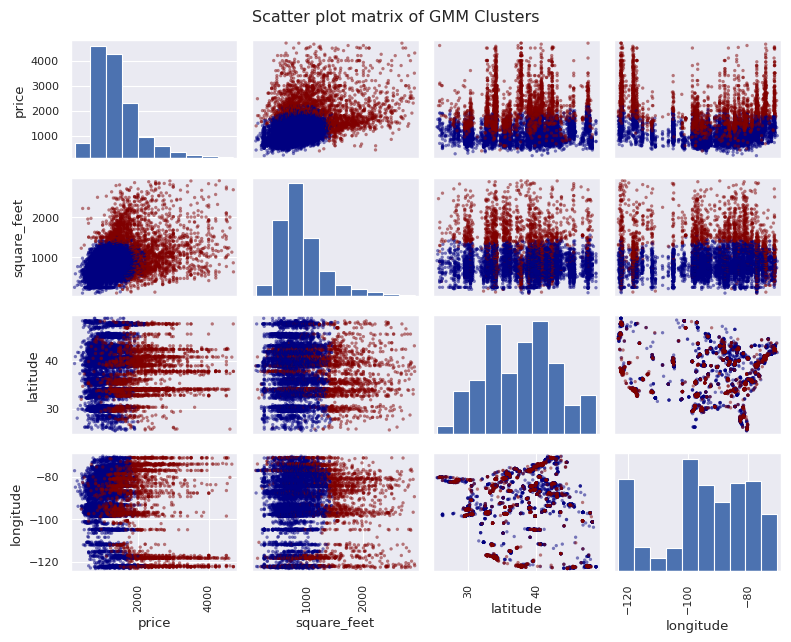

In [ ]:
# Plot scatter plot matrix
pd.plotting.scatter_matrix(data, c=gmm_labels, cmap='jet', figsize=(8,6.5))
plt.suptitle('Scatter plot matrix of GMM Clusters')
plt.tight_layout()
plt.savefig('Scatter_matrix_gmm.png', dpi=300, bbox_inches="tight")
plt.show()

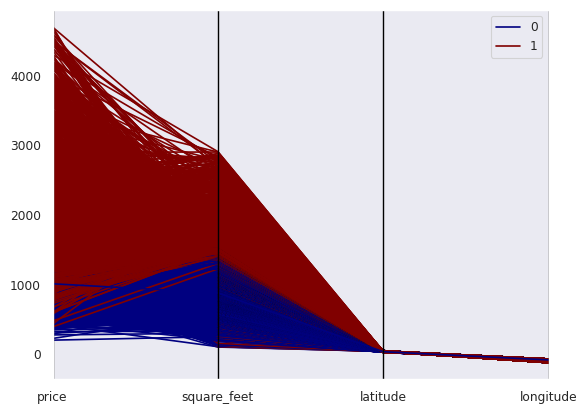

In [ ]:
# Plot parallel coordinates plot
pd.plotting.parallel_coordinates(data_gmm, 'cluster', colormap='jet')
plt.show()

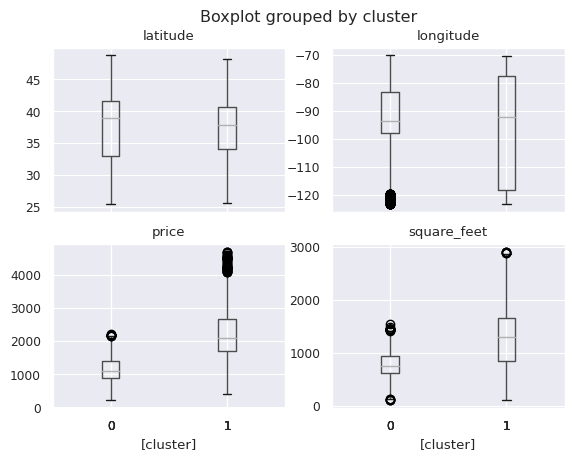

In [ ]:
# Plot grouped box plot
data_gmm.boxplot(by='cluster', sharey=False)
plt.show()

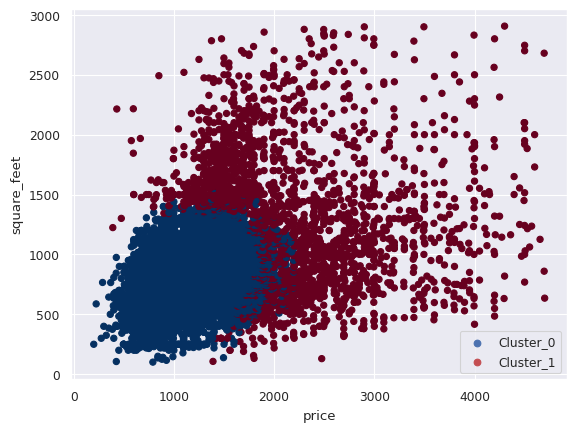

In [ ]:
# Scatter plot of price against square_feet
data_gmm.plot.scatter('price', 'square_feet', c='cluster', cmap='RdBu_r',
                      colorbar=False)
plt.scatter([], [], c='b', label='Cluster_0')
plt.scatter([], [], c='r', label='Cluster_1')
plt.legend(loc='lower right')
plt.show()

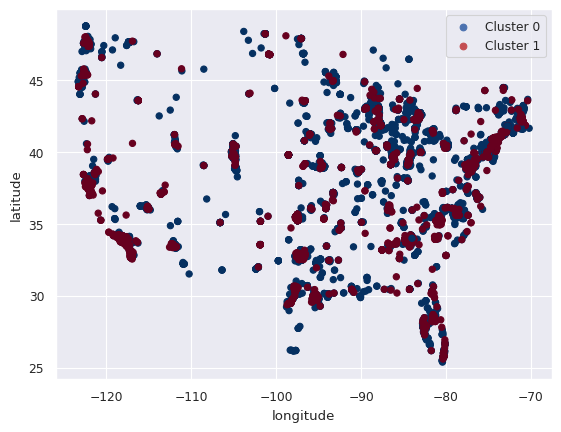

In [ ]:
# Scatter plot of longitude against latitude
data_gmm.plot.scatter('longitude', 'latitude', c='cluster', cmap='RdBu_r',
                      colorbar=False)
plt.scatter([], [], c='b', label='Cluster 0')
plt.scatter([], [], c='r', label='Cluster 1')
plt.legend()
plt.show()

# K-Means Clustering

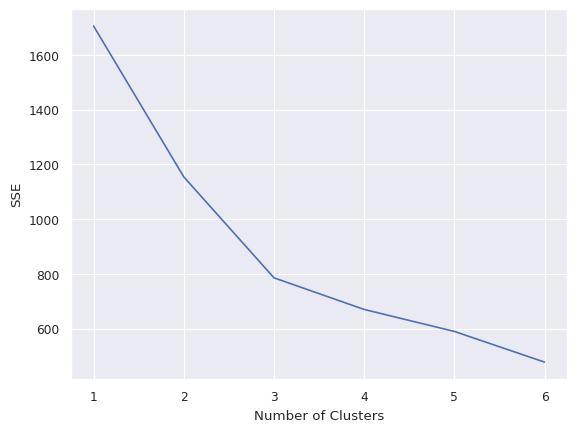

In [ ]:
# Decide upon number of clusters for k-means
n_clusters = [1,2,3,4,5,6]
SSE = []
for n in n_clusters:
    k_means = KMeans(n_clusters=n, n_init='auto')
    k_means.fit(data_scaled)
    SSE.append(k_means.inertia_)

plt.plot(n_clusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# K-Means clustering with k=2,
# We choose k=2 since we used 2 for GMM
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_scaled)
# Predict labels for each data point
km_labels = kmeans.labels_

In [ ]:
# Adding cluster label to data
data_km = data.copy()
data_km['cluster'] = km_labels
data_km

,price,square_feet,latitude,longitude,cluster
0,790,101,38.9057,-76.9861,1
1,425,106,37.9680,-87.6621,1
2,1390,107,38.8910,-77.0816,1
3,925,116,47.6160,-122.3275,0
4,880,125,38.8738,-77.1055,1
...,...,...,...,...,...
9736,2300,2879,33.0476,-96.7467,0
9737,3495,2900,43.0724,-89.4003,1
9738,2900,2900,38.6857,-121.1532,0
9739,4300,2906,37.7547,-121.9529,0


In [ ]:
# Analyse each cluster
data_km.groupby('cluster').describe().T

cluster                      0            1
price       count  4262.000000  5479.000000
            mean   1505.544815  1328.986311
            std     733.444126   604.185936
            min     300.000000   200.000000
            25%     990.000000   899.000000
            50%    1305.000000  1219.000000
            75%    1787.500000  1595.000000
            max    4700.000000  4654.000000
square_feet count  4262.000000  5479.000000
            mean    860.014313   941.056580
            std     417.562469   411.242606
            min     116.000000   101.000000
            25%     612.000000   675.500000
            50%     745.000000   850.000000
            75%    1000.000000  1127.500000
            max    2906.000000  2900.000000
latitude    count  4262.000000  5479.000000
            mean     35.886352    38.969190
            std       5.864719     4.272641
            min      26.159600    25.380100
            25%      30.371875    36.091300
            50%      33.945000    39.747500
            75%      39.655400    41.862500
            max      48.787100    48.260400
longitude   count  4262.000000  5479.000000
            mean   -107.813029   -83.464539
            std      10.883886     7.237894
            min    -123.328300  -101.777500
            25%    -118.390500   -88.188900
            50%    -104.850300   -83.583700
            75%     -97.687300   -77.059000
            max     -91.101200   -70.191600

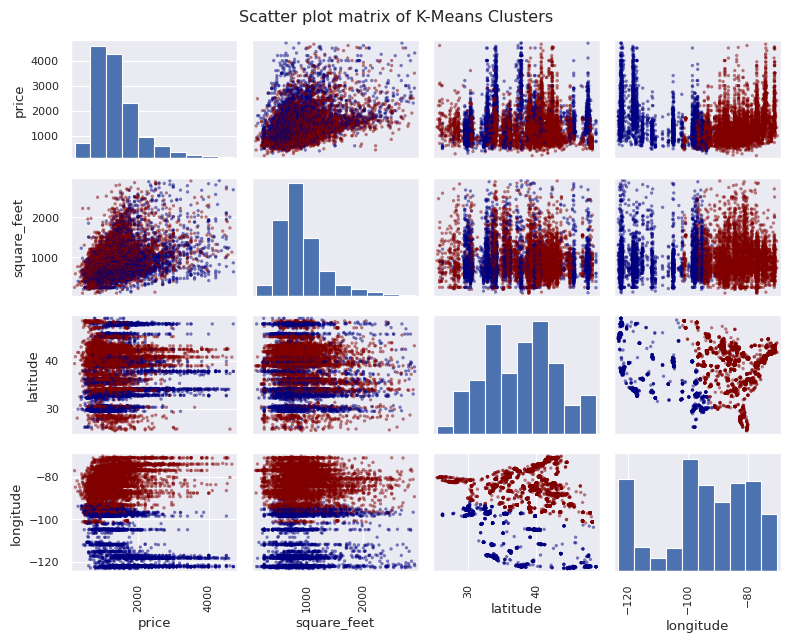

In [ ]:
# plot scatter plot matrix
pd.plotting.scatter_matrix(data, c=km_labels, cmap='jet', figsize=(8,6.5))
plt.suptitle('Scatter plot matrix of K-Means Clusters')
plt.tight_layout()
plt.savefig('Scatter_matrix_km.png', dpi=300, bbox_inches="tight")
plt.show()

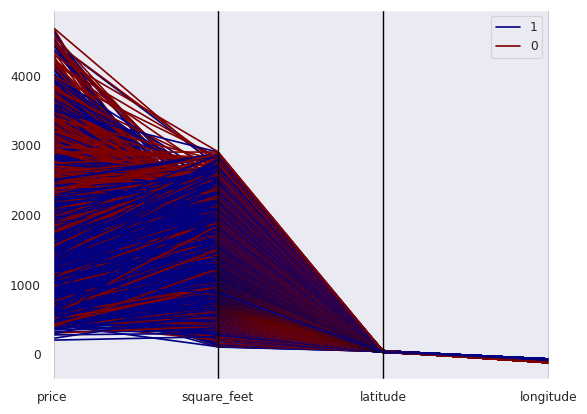

In [ ]:
# Plot parallel coordinates plot
pd.plotting.parallel_coordinates(data_km, 'cluster', colormap='jet')
plt.show()

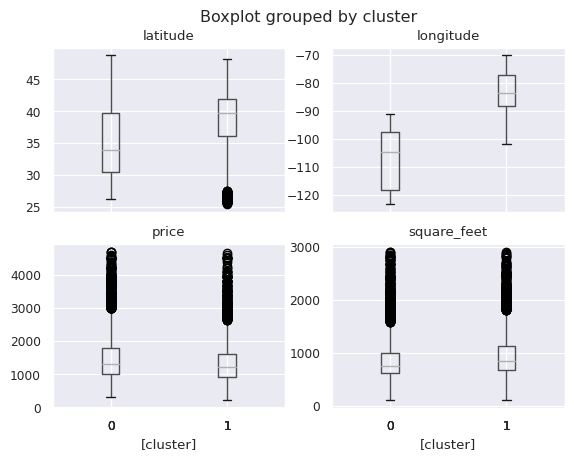

In [ ]:
# Plot grouped box plot
data_km.boxplot(by='cluster', sharey=False)
plt.show()

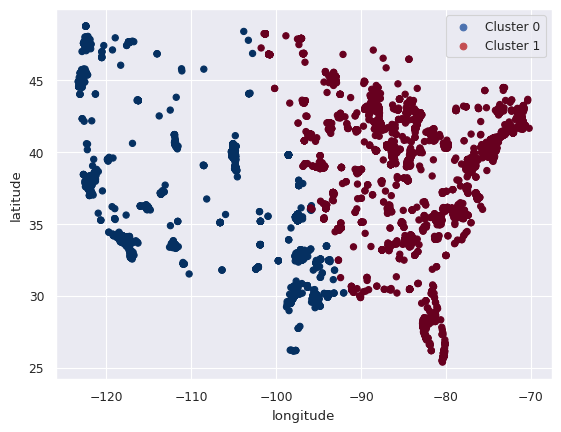

In [ ]:
# Scatter plot of longitude against latitude
data.plot.scatter('longitude', 'latitude', c=km_labels, cmap='RdBu_r',
                  colorbar=False)
plt.scatter([], [], c='b', label='Cluster 0')
plt.scatter([], [], c='r', label='Cluster 1')
plt.legend()
plt.show()

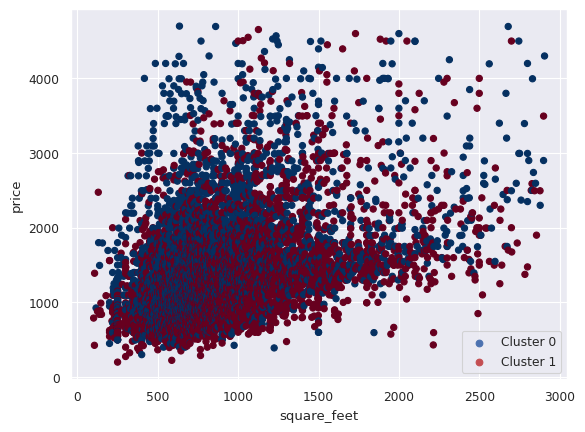

In [ ]:
# Scatter plot of price against square_feet
data.plot.scatter('square_feet', 'price', c=km_labels, cmap='RdBu_r',
                  colorbar=False)
plt.scatter([], [], c='b', label='Cluster 0')
plt.scatter([], [], c='r', label='Cluster 1')
plt.legend(loc='lower right')
plt.show()